In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_regression

In [115]:
'''
# 去除空数据

df = pd.read_csv('filtered_data.csv')

columns_to_check = ['Cond @ 25C', 'Oxygen Diss', 'Temp Water', 'pH', 'E.coli C-MF']
# 删除指定列中任何一列为空的行
df_cleaned = df.dropna(subset=columns_to_check)
df_cleaned.to_csv('cleaned_file.csv', index=False)
print("处理后的数据已保存为 'cleaned_file.csv'")'
'''

'\n# 去除空数据\n\ndf = pd.read_csv(\'filtered_data.csv\')\n\ncolumns_to_check = [\'Cond @ 25C\', \'Oxygen Diss\', \'Temp Water\', \'pH\', \'E.coli C-MF\']\n# 删除指定列中任何一列为空的行\ndf_cleaned = df.dropna(subset=columns_to_check)\ndf_cleaned.to_csv(\'cleaned_file.csv\', index=False)\nprint("处理后的数据已保存为 \'cleaned_file.csv\'")\'\n'

In [116]:
'''
# 对数据进行正弦和余弦变换

data = pd.read_csv('cleaned_sin_cos_transformed.csv') 
data_with_interactions = calculate_correlation(data)

# 将结果保存回原始 CSV 文件
data_with_interactions.to_csv('1.csv', index=False)  # index=False 避免保存行索引''
'''


"\n# 对数据进行正弦和余弦变换\n\ndata = pd.read_csv('cleaned_sin_cos_transformed.csv') \ndata_with_interactions = calculate_correlation(data)\n\n# 将结果保存回原始 CSV 文件\ndata_with_interactions.to_csv('1.csv', index=False)  # index=False 避免保存行索引''\n"

### **1. Read Data**

In [117]:
'''
# 提取某一站点的数据
df = pd.read_csv('1.csv')  # 假设数据文件是 data.csv

most_common_value = df.iloc[:, 0].value_counts().idxmax() 
data = df[df.iloc[:, 0] == most_common_value]  # 筛选出第一列等于该值的所有行
#data.to_csv('one_station.csv', index=False)  # 保存筛选后的数据

unique_values = df.iloc[:, 0].unique()
print(f"共有 {len(unique_values)} 种不同的内容。")
value_counts = df.iloc[:, 0].value_counts()
# 过滤出重复次数大于等于50的值
filtered_values = value_counts[value_counts >= 50].index
filtered_df = df[df.iloc[:, 0].isin(filtered_values)]
print(f"删除重复次数少于50的内容后，剩余数据量为: {len(filtered_df)} 行")
unique_values = filtered_df.iloc[:, 0].unique()
print(f"共有 {len(unique_values)} 种不同的内容。")
filtered_df.to_csv('2.csv', index=False)
'''

'\n# 提取某一站点的数据\ndf = pd.read_csv(\'1.csv\')  # 假设数据文件是 data.csv\n\nmost_common_value = df.iloc[:, 0].value_counts().idxmax() \ndata = df[df.iloc[:, 0] == most_common_value]  # 筛选出第一列等于该值的所有行\n#data.to_csv(\'one_station.csv\', index=False)  # 保存筛选后的数据\n\nunique_values = df.iloc[:, 0].unique()\nprint(f"共有 {len(unique_values)} 种不同的内容。")\nvalue_counts = df.iloc[:, 0].value_counts()\n# 过滤出重复次数大于等于50的值\nfiltered_values = value_counts[value_counts >= 50].index\nfiltered_df = df[df.iloc[:, 0].isin(filtered_values)]\nprint(f"删除重复次数少于50的内容后，剩余数据量为: {len(filtered_df)} 行")\nunique_values = filtered_df.iloc[:, 0].unique()\nprint(f"共有 {len(unique_values)} 种不同的内容。")\nfiltered_df.to_csv(\'2.csv\', index=False)\n'

In [118]:
'''
# 独热编码
df = pd.read_csv('2.csv')
one_hot_encoded = pd.get_dummies(df.iloc[:, 0], prefix='Location', dtype=int)

pca = PCA(n_components=8)
pca_features = pca.fit_transform(one_hot_encoded)
# 转换为 DataFrame
pca_df = pd.DataFrame(pca_features, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8'])


df_encoded = pd.concat([pca_df, df], axis=1)
df_encoded.to_csv('3_PCA.csv', index=False) 
'''

"\n# 独热编码\ndf = pd.read_csv('2.csv')\none_hot_encoded = pd.get_dummies(df.iloc[:, 0], prefix='Location', dtype=int)\n\npca = PCA(n_components=8)\npca_features = pca.fit_transform(one_hot_encoded)\n# 转换为 DataFrame\npca_df = pd.DataFrame(pca_features, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8'])\n\n\ndf_encoded = pd.concat([pca_df, df], axis=1)\ndf_encoded.to_csv('3_PCA.csv', index=False) \n"

In [162]:
df = pd.read_csv('stations_encoded_data_PCA.csv')
 
data = df.values 
data.shape

(1381, 30)

### **2. Preprocessing**

In [ ]:
'''
data = np.array([
    [1, 2, 3, 100],  # 第 0 行
    [4, 5, 6, 7],     # 第 1 行
    [8, 9, 10, 11],   # 第 2 行
    [12, 13, 14, 15], # 第 3 行
    [16, 17, 18, 200] # 第 4 行
])
col = data[:, 3]  # 第 0 行
lower_bound = 5  # 下界
upper_bound = 20  # 上界
outlier_indices = np.where((col < lower_bound) | (col > upper_bound))[0]
data = np.delete(data, outlier_indices, axis=0)
data
'''

array([[ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [169]:
number_encoded_columns = 8

# remove outliers
def outlier_filter(data):
    processed_data = data[:, number_encoded_columns:]

    for i in range(processed_data.shape[1]):
        processed_data = data[:, number_encoded_columns:]
        col = processed_data[:, i]
        mean = np.mean(col)
        std = np.std(col)
        print(f"Mean: {mean}, Std: {std}")
        lower_bound = mean - 3 * std
        upper_bound = mean + 3 * std
        outlier_indices = np.where((col < lower_bound) | (col > upper_bound))[0]

        if len(outlier_indices) > 0 :
            data = np.delete(data, outlier_indices, axis=0)

    

    return data

#normalization
def z_score_normalization(data):
    first_16_columns = data[:, :number_encoded_columns] 
    columns_to_normalize = data[:, number_encoded_columns:-1]  
    last_column = data[:, -1:]

    mean = np.mean(columns_to_normalize, axis=0)  
    std = np.std(columns_to_normalize, axis=0)  
    std[std == 0] = 1

    normalized_columns = (columns_to_normalize - mean) / std
    normalized_data = np.hstack((first_16_columns, normalized_columns, last_column))
    
    return normalized_data

def calculate_correlation(data):
    # Create new columns for pairwise multiplication of specific columns by their names
    columns = ['Cond @ 25C','Oxygen Diss','Temp Water','pH','cos_day_of_year','sin_day_of_year']  # Update with actual column names
    for i in range(len(columns)):
        for j in range(i+1, len(columns)):
            data[f'{columns[i]}_x_{columns[j]}'] = data[columns[i]] * data[columns[j]]

    for col in columns:
        data[f'{col}_squared'] = data[col] ** 2
    return data


In [170]:
data[:, number_encoded_columns]

array([130., 235., 278., ..., 798., 417., 826.])

In [171]:
filtered_data = outlier_filter(data)
print(filtered_data.shape)

filtered_normalized_X = z_score_normalization(filtered_data)

Mean: 776.1942795076033, Std: 417.60737631962286
Mean: 9.592589311859443, Std: 2.400217483222545
Mean: 10.85521064301552, Std: 3.937244766651587
Mean: 7.86061732050333, Std: 0.3392034854709819
Mean: 0.09482813422313627, Std: 0.6850441684039057
Mean: -0.056076434529649624, Std: 0.7201232851297075
Mean: 7058.916290662652, Std: 3218.3322433823064
Mean: 8190.785129179331, Std: 4983.10418584518
Mean: 5861.603733741393, Std: 2475.161623350687
Mean: 62.94121702620601, Std: 544.4976720321102
Mean: -58.4034832210526, Std: 589.3832031527124
Mean: 99.01967381316999, Std: 35.384307031555714
Mean: 75.39654298069497, Std: 18.775032606435147
Mean: 1.603911863849773, Std: 6.593967394136216
Mean: 0.21848606229198608, Std: 7.094185353691042
Mean: 84.09586400928792, Std: 30.132555392048538
Mean: -0.9379561517292532, Std: 7.795529359100446
Mean: -1.642808220918621, Std: 8.056696093587883
Mean: 0.8424638974689328, Std: 5.371538841546683
Mean: -0.3771305662838455, Std: 5.6754764668040805
Mean: -0.0022172302

### **Model training**

In [172]:
# Configurations
num_epochs = 1200
batch_size = 128
lr = 0.005
input_feature_num = filtered_normalized_X.shape[1] - 1  

train_losses = []
val_losses = []
test_losses = []
best_loss = float('inf')  # 初始化最佳损失值为正无穷
best_epoch = 0  # 记录最佳损失值对应的 epoch

# 检查是否有可用的GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')


# Prepare input and output data

X = filtered_normalized_X[:, 0:-1]  # 所有样本的第 4-7 列作为输入
y = filtered_normalized_X[:, -1]
'''
X = X_new  # 所有样本的第 4-7 列作为输入
y = y
'''
# Split the data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)  # 70% train, 30% temp
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)  # 15% val, 15% test

# Convert to PyTorch tensors and move to GPU
X_train = torch.tensor(X_train, dtype=torch.float32).to(device)
X_val = torch.tensor(X_val, dtype=torch.float32).to(device)
X_test = torch.tensor(X_test, dtype=torch.float32).to(device)
y_train = torch.tensor(y_train, dtype=torch.float32).view(-1, 1).to(device)
y_val = torch.tensor(y_val, dtype=torch.float32).view(-1, 1).to(device)
y_test = torch.tensor(y_test, dtype=torch.float32).view(-1, 1).to(device)

# Create TensorDataset and DataLoader
train_dataset = TensorDataset(X_train, y_train)
val_dataset = TensorDataset(X_val, y_val)
test_dataset = TensorDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)


Using device: cuda


In [173]:
y

array([ 90., 290.,  73., ..., 220., 135., 210.])

Epoch [10/1200], Train Loss: 144.6405, Val Loss: 103.7767
Epoch [20/1200], Train Loss: 108.4679, Val Loss: 73.4939
Epoch [30/1200], Train Loss: 90.1649, Val Loss: 57.4505
Epoch [40/1200], Train Loss: 87.2631, Val Loss: 48.1853
Epoch [50/1200], Train Loss: 78.4996, Val Loss: 40.3179
Epoch [60/1200], Train Loss: 74.6765, Val Loss: 35.7784
Epoch [70/1200], Train Loss: 80.0914, Val Loss: 31.1111
Epoch [80/1200], Train Loss: 74.6038, Val Loss: 31.5822
Epoch [90/1200], Train Loss: 72.3070, Val Loss: 29.9032
Epoch [100/1200], Train Loss: 68.6070, Val Loss: 29.6612
Epoch [110/1200], Train Loss: 71.5647, Val Loss: 29.1679
Epoch [120/1200], Train Loss: 66.3386, Val Loss: 31.7192
Epoch [130/1200], Train Loss: 70.0120, Val Loss: 33.5248
Epoch [140/1200], Train Loss: 66.0856, Val Loss: 31.4224
Epoch [150/1200], Train Loss: 72.0923, Val Loss: 28.5608
Epoch [160/1200], Train Loss: 70.7273, Val Loss: 28.4313
Epoch [170/1200], Train Loss: 70.6129, Val Loss: 28.5435
Epoch [180/1200], Train Loss: 67.6501

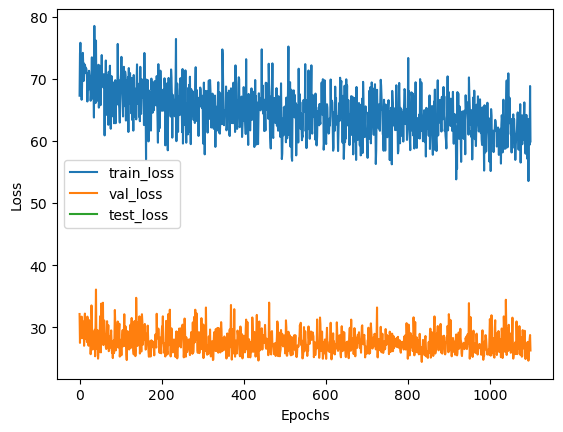

Final Test Loss: 9.3831

Sample Predictions vs True Values:
Predicted: 196.4307, True: 198.0000
Predicted: 261.6694, True: 220.0000
Predicted: 210.3148, True: 210.0000
Predicted: 71.7033, True: 63.0000
Predicted: 66.7225, True: 55.0000
Predicted: 91.9341, True: 91.0000
Predicted: 86.1041, True: 82.0000
Predicted: 88.8924, True: 90.0000
Predicted: 359.3006, True: 350.0000
Predicted: 91.8489, True: 100.0000
Predicted: 72.9527, True: 64.0000
Predicted: 83.8245, True: 81.0000
Predicted: 492.1885, True: 600.0000
Predicted: 329.9203, True: 300.0000
Predicted: 93.0046, True: 99.0000
Predicted: 320.2635, True: 320.0000
Predicted: 149.6856, True: 162.0000
Predicted: 286.9358, True: 290.0000
Predicted: 82.8604, True: 81.0000
Predicted: 725.0803, True: 700.0000
Predicted: 459.0964, True: 600.0000
Predicted: 85.6646, True: 82.0000
Predicted: 702.4377, True: 710.0000
Predicted: 692.0786, True: 710.0000
Predicted: 81.4417, True: 73.0000
Predicted: 78.4954, True: 64.0000
Predicted: 80.3080, True: 73.

/tmp/ipykernel_11720/1207115736.py:85: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_model.pth'))


In [174]:
# ========================================
# Define the neural network model
# ========================================
import torch.nn as nn

class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        # 输入层到第一隐藏层
        self.fc1 = nn.Linear(input_feature_num, 64)  # 输入特征数量为 input_feature_num，输出 128
        self.dropout1 = nn.Dropout(0.5)  # Dropout 层，丢弃概率为 0.5
        self.fc2 = nn.Linear(64, 32)  # 输入 64，输出 32
        self.dropout2 = nn.Dropout(0.5)
        self.fc3 = nn.Linear(32, 1)  # 输入 32，输出 16
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = self.fc3(x)
        return x

# 将模型移动到GPU
model = NeuralNetwork().to(device)

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=lr)


# ========================================
# Train the model
# ========================================
for epoch in range(num_epochs):
    model.train()
    epoch_train_loss = 0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss = torch.sqrt(loss)
        loss.backward()
        optimizer.step()
        epoch_train_loss += loss.item()
    train_losses.append(epoch_train_loss / len(train_loader))
    
    # Validation
    model.eval()
    epoch_val_loss = 0
    with torch.no_grad():
        for X_batch, y_batch in val_loader:
            val_outputs = model(X_batch)
            val_loss = criterion(val_outputs, y_batch)
            val_loss = torch.sqrt(val_loss)
            epoch_val_loss += val_loss.item()
            
    val_losses.append(epoch_val_loss / len(val_loader))
    
    # 更新最佳损失值和对应的 epoch
    if val_losses[-1] < best_loss:
        best_loss = val_losses[-1]
        best_epoch = epoch + 1  
        best_model_state = model.state_dict()  # 保存最佳模型的参数
        torch.save(best_model_state, 'best_model.pth')  # 保存模型到文件
    
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_losses[-1]:.4f}, Val Loss: {val_losses[-1]:.4f}')

# 打印最佳损失值和对应的 epoch
print(f'Best Validation Loss: {best_loss:.4f} at Epoch {best_epoch}')

# Plot the loss
plt.plot(train_losses[100:], label='train_loss')
plt.plot(val_losses[100:], label='val_loss')
plt.plot(test_losses[100:], label='test_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# ========================================
# Evaluate the model on the test set
# ========================================
model.load_state_dict(torch.load('best_model.pth')) 
model.eval()
test_loss = 0
predictions = []
true_values = []

with torch.no_grad():
    for X_batch, y_batch in test_loader:
        outputs = model(X_batch)
        test_loss += criterion(outputs, y_batch).item()
        test_loss = np.sqrt(test_loss)
        predictions.extend(outputs.cpu().numpy())
        true_values.extend(y_batch.cpu().numpy())

# 打印测试集损失
test_loss /= len(test_loader)
print(f'Final Test Loss: {test_loss:.4f}')

# 打印部分预测值和真实值
print("\nSample Predictions vs True Values:")
for i in range(50):  # 打印前 10 个样本
    print(f"Predicted: {predictions[i][0]:.4f}, True: {true_values[i][0]:.4f}")